<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Закон-больших-чисел" data-toc-modified-id="Закон-больших-чисел-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Закон больших чисел</a></span><ul class="toc-item"><li><span><a href="#ЗБЧ" data-toc-modified-id="ЗБЧ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЗБЧ</a></span></li><li><span><a href="#Сходимость-по-вероятности" data-toc-modified-id="Сходимость-по-вероятности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Сходимость по вероятности</a></span></li><li><span><a href="#Расходимость--по-вероятности" data-toc-modified-id="Расходимость--по-вероятности-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Расходимость  по вероятности</a></span></li></ul></li><li><span><a href="#Что-разрешает-ЗБЧ" data-toc-modified-id="Что-разрешает-ЗБЧ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Что разрешает ЗБЧ</a></span><ul class="toc-item"><li><span><a href="#Сложные-распределения" data-toc-modified-id="Сложные-распределения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сложные распределения</a></span></li><li><span><a href="#Удав-и-багеты" data-toc-modified-id="Удав-и-багеты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удав и багеты</a></span></li><li><span><a href="#Парадокс-дней-рождений" data-toc-modified-id="Парадокс-дней-рождений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Парадокс дней рождений</a></span></li></ul></li><li><span><a href="#Центральная-предельная-теорема" data-toc-modified-id="Центральная-предельная-теорема-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Центральная предельная теорема</a></span><ul class="toc-item"><li><span><a href="#Центральная-предельная-теорема" data-toc-modified-id="Центральная-предельная-теорема-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Центральная предельная теорема</a></span></li><li><span><a href="#Упражнение-(ЦПТ-для-равномерного)" data-toc-modified-id="Упражнение-(ЦПТ-для-равномерного)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Упражнение (ЦПТ для равномерного)</a></span></li><li><span><a href="#Сходимость-по-распределению" data-toc-modified-id="Сходимость-по-распределению-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сходимость по распределению</a></span></li></ul></li><li><span><a href="#Мощь-средних" data-toc-modified-id="Мощь-средних-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Мощь средних</a></span><ul class="toc-item"><li><span><a href="#Ещё-раз-о-квантилях" data-toc-modified-id="Ещё-раз-о-квантилях-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ещё раз о квантилях</a></span></li><li><span><a href="#Мощь-средних-и-асимптотические-доверительные-интервалы" data-toc-modified-id="Мощь-средних-и-асимптотические-доверительные-интервалы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Мощь средних и асимптотические доверительные интервалы</a></span><ul class="toc-item"><li><span><a href="#Ульяна-смотрит-игру-престолов" data-toc-modified-id="Ульяна-смотрит-игру-престолов-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Ульяна смотрит игру престолов</a></span></li><li><span><a href="#Подруга-Ульяны" data-toc-modified-id="Подруга-Ульяны-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Подруга Ульяны</a></span></li></ul></li></ul></li></ul></div>



#  Закон больших чисел

Просимулируем картинку из презентации для Закона больших чисел и немного обсудим сходимость по вероятности.

---------------

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
from scipy import stats

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## ЗБЧ

**Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)**

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$


__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$.

In [ ]:
n_obs = 100           #сколько раз подкидываемм кубик

dice = np.arange(1,7) #создаем массив с возможными исходами

# подкидываем кубик с повторениями много раз
x = np.random.choice(dice, size=n_obs) 
x

array([3, 3, 2, 5, 6, 4, 4, 1, 6, 5, 6, 4, 1, 3, 6, 3, 3, 6, 5, 2, 3, 3,
       6, 1, 5, 5, 3, 5, 6, 1, 3, 3, 4, 3, 5, 1, 3, 2, 4, 2, 6, 2, 5, 1,
       4, 3, 3, 4, 2, 6, 3, 1, 1, 1, 3, 5, 1, 1, 3, 5, 2, 6, 3, 6, 3, 4,
       4, 6, 6, 2, 2, 4, 1, 2, 2, 4, 1, 4, 6, 4, 6, 2, 6, 1, 3, 6, 6, 1,
       6, 5, 6, 4, 1, 1, 4, 4, 2, 6, 2, 5])

In [ ]:
# считаем кумулятивную сумму
x_cumsum = np.cumsum(x)
x_cumsum

array([  5,   9,  14,  18,  23,  28,  32,  38,  41,  43,  47,  49,  54,
        56,  61,  66,  71,  74,  75,  79,  84,  86,  90,  91,  92,  98,
        99, 103, 105, 111, 117, 120, 121, 125, 130, 131, 132, 134, 140,
       144, 147, 152, 156, 162, 163, 164, 168, 170, 173, 174, 180, 184,
       185, 191, 194, 198, 204, 206, 208, 213, 215, 217, 221, 223, 226,
       230, 231, 235, 238, 242, 248, 249, 254, 256, 257, 261, 264, 267,
       272, 275, 276, 280, 281, 285, 289, 290, 294, 296, 299, 301, 306,
       310, 311, 314, 318, 322, 328, 329, 330, 332])

In [ ]:
np.arange(1, n_obs + 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
# делим на число наблюдений
x_mean = x_cumsum/np.arange(1, n_obs + 1)
x_mean

array([5.        , 4.5       , 4.66666667, 4.5       , 4.6       ,
       4.66666667, 4.57142857, 4.75      , 4.55555556, 4.3       ,
       4.27272727, 4.08333333, 4.15384615, 4.        , 4.06666667,
       4.125     , 4.17647059, 4.11111111, 3.94736842, 3.95      ,
       4.        , 3.90909091, 3.91304348, 3.79166667, 3.68      ,
       3.76923077, 3.66666667, 3.67857143, 3.62068966, 3.7       ,
       3.77419355, 3.75      , 3.66666667, 3.67647059, 3.71428571,
       3.63888889, 3.56756757, 3.52631579, 3.58974359, 3.6       ,
       3.58536585, 3.61904762, 3.62790698, 3.68181818, 3.62222222,
       3.56521739, 3.57446809, 3.54166667, 3.53061224, 3.48      ,
       3.52941176, 3.53846154, 3.49056604, 3.53703704, 3.52727273,
       3.53571429, 3.57894737, 3.55172414, 3.52542373, 3.55      ,
       3.52459016, 3.5       , 3.50793651, 3.484375  , 3.47692308,
       3.48484848, 3.44776119, 3.45588235, 3.44927536, 3.45714286,
       3.49295775, 3.45833333, 3.47945205, 3.45945946, 3.42666

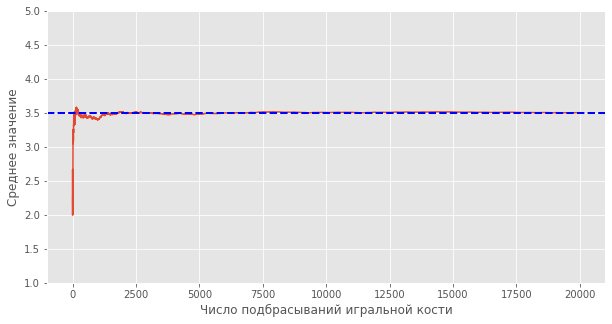

In [ ]:
plt.figure(figsize=(10,5))
n_obs = 20000
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_mean = np.cumsum(x)/np.arange(1, n_obs + 1)

plt.plot(x_mean)
plt.axhline(3.5, color='b', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение')
plt.ylim(1,5)
plt.show()

## Сходимость по вероятности

Увидели, что оно сходится? Вопрос только в том как именно. Над стрелкой в ЗБЧ есть буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Нарисуем её! Возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ попадает в коридор и всё реже выбивается из него. 

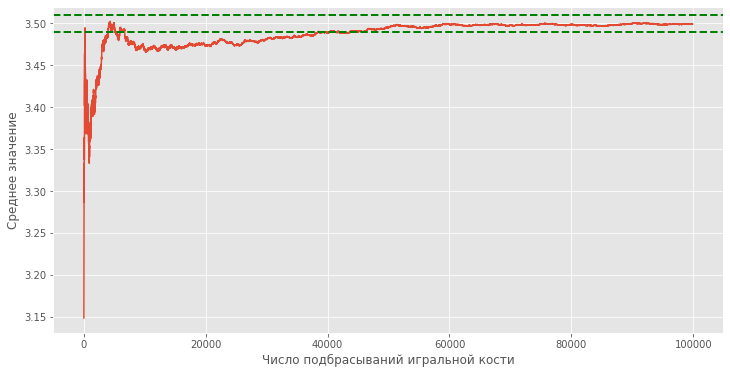

In [ ]:
n_obs = 100000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_cumsum = np.cumsum(x)

x_mean = x_cumsum/np.arange(1, n_obs + 1)

eps = 0.01

plt.figure(figsize=(12,6))
plt.plot(x_mean[100:])
plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости, как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [ ]:
n_obs = 10**4

# каждый раз подбрасываем кубик 1000 раз
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))

# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_means = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_means.shape

(10000, 1000)

In [ ]:
x_means[:,:10].shape

(10000, 10)

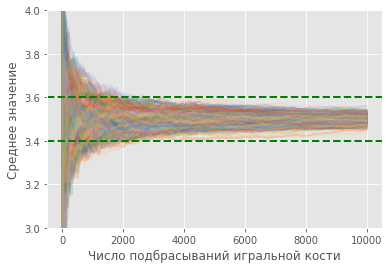

In [ ]:
eps= 0.1
plt.plot(x_means[:10000,:], alpha=0.2)#, c='grey')


plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.ylim(3,4)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

In [ ]:
x_means.shape

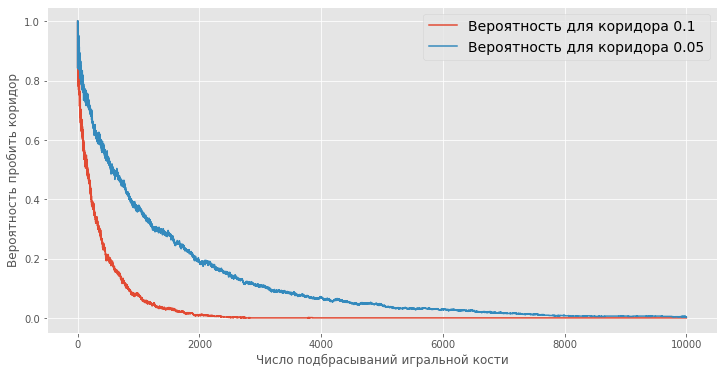

In [ ]:
eps1 = 0.1
eps2 = 0.05

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_means - 3.5) > eps1
bad_events_2 = np.abs(x_means - 3.5) > eps2


# усредняем траектории -> вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"Вероятность для коридора {eps1}")
plt.plot(proba_2, label = f"Вероятность для коридора {eps2}")
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор')
plt.legend(fontsize=14);

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом для более узкого коридора вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего. Немного позже мы её вычислим. Тогда окажется, что это 

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 

<center>
<img src="image/animation_prob_conv.gif" width="1800"> 
</center>

## Расходимость  по вероятности


Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие.

Распределение Коши тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Красота, при этом, приносит нам кучу проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши __(математического ожидания то не существует).__ 

Построим для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [ ]:
cauchy_rv = sts.cauchy()  # генератор 

n_obs = 10**4

# 1000 траекторий по n_obs шагов
x = cauchy_rv.rvs(size = (n_obs,1000))
x.shape

(10000, 1000)

In [ ]:
# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_mean.shape

(10000, 1000)

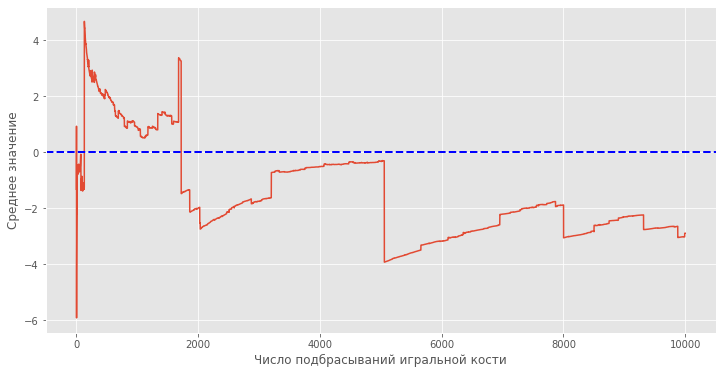

In [ ]:
# Нарисуем одну любую траекторию

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

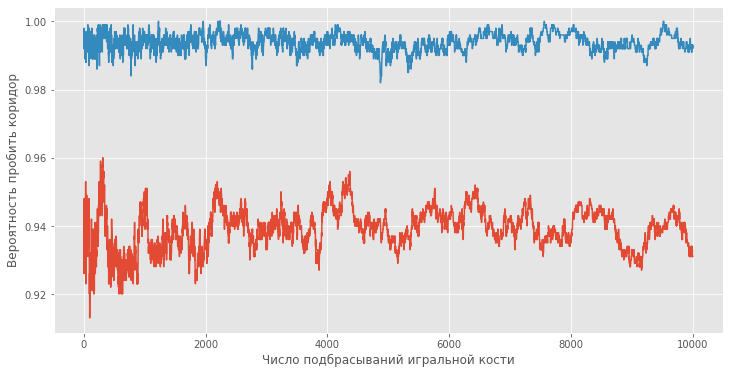

In [ ]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор');

Никакого движения к нулю. Постоянные пробоины в нашем коридоре. При этом во времени их количество никак не уменьшается. Так выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоины не очень важна. В случае, когда сходимость есть, пробоины также могут быть очень большими, но они происходят всё реже.

Давайте посмотрим на то как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="image/animation_prob_unconv.gif" width="1400"> 
</center>

#  Что разрешает ЗБЧ


---------------

## Сложные распределения

ЗБЧ разрешает нам решать реальные проблемы с помощью симуляций. Например, можно оценить математическое ожидание случайной величины $\frac{1}{X}$, где $X \sim N(5; 3)$ без взятия интегралов.

In [ ]:
n_obs = 10**6

norm_rv = stats.norm(loc=5, scale=3)  
x = norm_rv.rvs(n_obs)

np.mean(1/x)

Если бы не было питона пришлось бы искать такой интеграл: 

$$
\mathbb{E} \left(\frac{1}{X} \right) = \int_{-\infty}^{+\infty} \frac{1}{x} \cdot \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - 5)^2}{2 \cdot 3^2}} dx.
$$

> __Важно:__ для данного примера подход с симуляциями не работает. Интеграл расходится, так как этого математического ожидания не существует. При перезапуске симуляций мы каждый раз будем получать в качестве стреднего новые числа. Если мы попробуем нарисовать в динамике, к чему сходится выборочное среднее, мы увидим, что никакой сходимости тут нет. С делением случайных величин надо быть очень осторожным. 

-------------------------

__Другой пример.__ Также легко оценить многие вероятности. Например, оценим вероятность $P(X_1 + X_2 + X_3^2 > 5)$, где величины $X_i$ независимы и одинаково равномерно распределены $X_i \sim U[0;2]$:

In [ ]:
n_obs = 10**7

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

success = x_1 + x_2 + x_3**2 > 5
success[:5]

In [ ]:
np.sum(success) / n_obs

Здесь вектор success будет содержать значение `True` там, где условие `x_1 + x_2 + x_3**2 > 5` выполнено, и `False` там, где условие не выполнено. При сложении командой `np.sum()` каждое `True` будет посчитано как единица, а каждое `False` как ноль. Поэтому `np.sum(success)` даст количество раз, когда условие `x_1 + x_2 + x_3**2 > 5` выполнено.

__Как найти такую вероятность руками:__ 

- Первым шагом нам придётся найти распределение для $X_3^2$ 
- Втором шагом по формуле свёртки надо будет найти распределение суммы
- Третьим шагом можно посчитать вероятность

Почти на каждом шаге мы сталкиваемся с интегрированием. 

__Ещё пример.__ давайте найдём условную вероятность $P(X_1 + X_2 + X_3 > 0.8 \mid X_3 < 0.1)$. Снова используем для этого всю мощь `numpy` и сделаем срез по всем объектам, попавшим под условие.

In [ ]:
n_obs = 10**6

uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

uslovie = x_3 < 0.1

# x[uslovie] оставит в векторе только те элементы, где uslovie == True
success = x_1[uslovie] + x_2[uslovie] + x_3[uslovie] > 0.8
np.sum(success) / np.sum(uslovie)

In [ ]:
# можно посмотреть сколько раз за всю симуляцию x_3 < 0.1
np.sum(uslovie)

__Как найти такую вероятность руками:__ 

- Первым шагом по формуле свёртки надо будет найти распределение суммы
- Вторым шагом нам надо будет найти условную плотность 
- Третьим шагом можно посчитать вероятность

__Тем не менее это не говорит про ненужность аналитической работы.__ 

- Постоянно делать симуляции вместо того, чтобы один раз получить формулу и считать по ней - неэффективно 
- Часто возникают ситуации, когда за счёт генераций получить правильный ответ очень сложно. Например, куча проблем возникает для многомерных распределений.

> Подобные численные методы для оценки разных характеристик называются методами Монте-Карло.


## Удав и багеты

Удав Анатолий любит французские багеты. Длина французского багета равна $1$ метру. За один укус Удав Анатолий поедает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ укусов. 

Найдём $\mathbb{E}(N)$ и $Var(N)$ с помощью симуляций.

In [ ]:
# Багеты! Давайте начнём с одной итерации эксперемента.
unif_rv = stats.uniform(0, 1)

l = 1 # длина багета
m = 0 # число укусов

# пока длина багета больше 0
while l > 0:
    # делай укусы
    l -= unif_rv.rvs(1)
    m += 1 # на один укус стало больше

print(m)

Одну итерацию можно обернуть в функцию, чтобы было удобнее пользоваться. 

In [ ]:
def eat_one_baguette():
    l = 1
    m = 0 
    while l > 0:
        l -= unif_rv.rvs(1)
        m += 1

    return(m)

eat_one_baguette()

Теперь мы можем провести много итераций эксперимента.

In [ ]:
n_obs = 10**4 # количество итераций эксперимента
N = [eat_one_baguette() for i in range(n_obs)]

In [ ]:
np.mean(N)

In [ ]:
np.e

In [ ]:
np.var(N)

## Парадокс дней рождений

__Парадокс дней рождений:__ в произвольной группе из $50$ человек вероятность того, что хотябы у двоих людей дни рождения совпадут, равна $0.97$. Но это в теории, при предпосылке, что люди равномерно рождаются в течение года. Давайте проверим это. 


В табличке `bdates.tsv` лежит информация о $1$ млн. пользователей из вконтакте. В табличке можно найти данные о имени пользователя `first_name`, его поле `sex`, городе проживания `city`, дне `bdate`, месяце `bmonth` и годе `byear` рождения.

In [ ]:
df = pd.read_csv("./data/vk_bdate.tsv", sep="\t", 
                 dtype={'byear': pd.Int64Dtype(), 
                        'bmonth': pd.Int64Dtype(), 
                         'bday': pd.Int64Dtype()}
                )
print(df.shape)
df.head()

Удалим из данных всех, кто не указал когда он родился.

In [ ]:
df = df[~(df.bmonth.isnull() | df.bday.isnull())]
df.shape

Заведём колонку с днём и месяцем рождения человека.

In [ ]:
df['bdate'] = df['bday'].astype(str) + '-' + df['bmonth'].astype(str) 
df

Построим гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?

In [ ]:
plt.figure(figsize=(10, 5))

df.bmonth.value_counts().sort_index().plot(kind='bar');

plt.title('Количество дней рождений по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество дней рождений в этот месяц');

Эмпирически оценим вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения.

In [ ]:
df.sample(5) # выборка в 5 человек

In [ ]:
# если уникальных дат меньше 50 => совпадение
df.bdate.sample(50).unique().size 

In [ ]:
n = 10**4  # число симуляций 
m = 0      # счётчик для наших событий

for i in tqdm(range(n)):
    m += df.bdate.sample(50).unique().size < 50

In [ ]:
m/n # итоговая вероятность 

Похоже на правду. 


#  Центральная предельная теорема

Теперь поговорим про ЦПТ 

---------------

## Центральная предельная теорема




**ЦПТ**

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \overset{d}{\to} N(0,1)
$$


__Простым языком:__ 

* При определённых условиях сумма достаточно большого числа случайных величин имеет распределение близкое к нормальному 
* __Главное,__ чтобы случайные величины были похожи и не было такого, что одна резко выделяется на фоне остальных 


## Упражнение (ЦПТ для равномерного) 

Пусть $X \sim U[-1;1]$, пусть $Y = X_1 + \ldots + X_n$ 

* Нарисуем гистограмму для $X_1$, $X_1 + X_2$,  $X_1 + X_2 + X_3$ и $X_1 + X_2 + X_3 + X_4$.
* На последней картинке нарисуем плотность распределения $N(0,1)$ и визуально сравним, насколько сильно оно отличается от гистограммы. 

In [ ]:
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = sts.uniform(-1, 2)

In [ ]:
x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)
x_4 = uniform_rv.rvs(n_obs)

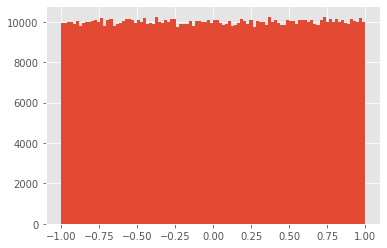

In [ ]:
plt.hist(x_1, bins=100); # равномерное распределение

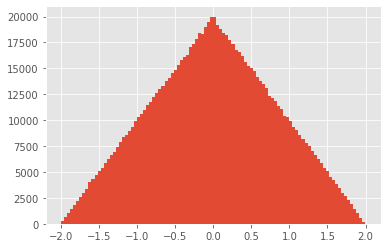

In [ ]:
plt.hist(x_1 + x_2, bins=100); # треугольное распределение

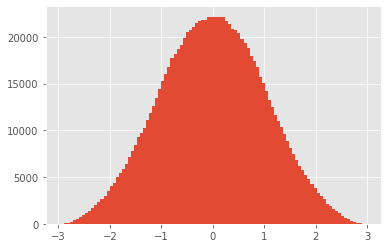

In [ ]:
plt.hist(x_1 + x_2 + x_3, bins=100); # уже прослеживается купол

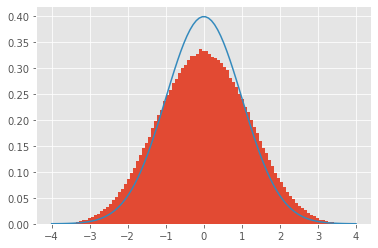

In [ ]:
plt.hist(x_1 + x_2 + x_3 + x_4, bins=100, density=True); # ещё куполообразнее

# пририсуем нормальное распределение
x = np.linspace(-4, 4, 100)
pdf = sts.norm().pdf(x)
plt.plot(x, pdf);

На практике ЦПТ говорит нам, что при больших значениях $n$ мы можем заменять распределение средних нормальным и не особо сильно при этом ошибаться. 

Возникает вопрос: __А что такое большие значения n? Когда наступает асимптотика?__ Для разных распределений  и природных явлений она наступает по-разному. Для равномерного уже для четырёх слагаемых распределение довольно сильно напоминает $N(0,1)$.
 
Вот так равномерное распределение будет вести себя дальше: 

<center>
<img src="image/animation_CPT_1.gif" width="350"> 
</center>

А вот пример для хи-квадрат с одной степенью свободы: 

<center>
<img src="image/animation_CPT_2.gif" width="350"> 
</center>

Из довольно медленно сходящихся к нормальному распределений, наверное, можно выделить логнормальное распределение.

## Сходимость по распределению

В ЦПТ над мы написали над стрелкой букву $d$. Она означает, что последовательность случайных величин сходится по распределению. 

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ _по распределению,_ если $F_{X_n}(x) \to F_X(x)$ для всех $x$, в которых $F_X(x)$ непрерывна. Если функции сходятся, она есть. Если не сходятся, её нет.  

__Пример:__ распредеелние Стьюдента при большом $n$ (число степеней свободы) становится похоже на нормальное, то есть $t(n) \overset{d}{\to}  N(0,1)$.

Давайте это продемонстрируем: 

* Построим на картинке линию: плотность для $N(0,1)$.
* Построим пять пунктирных разноцветных линий: $t(1)$, $t(2)$, $t(5)$, $t(10)$, $t(50)$.
* Сделаем то же самое для функций распределения

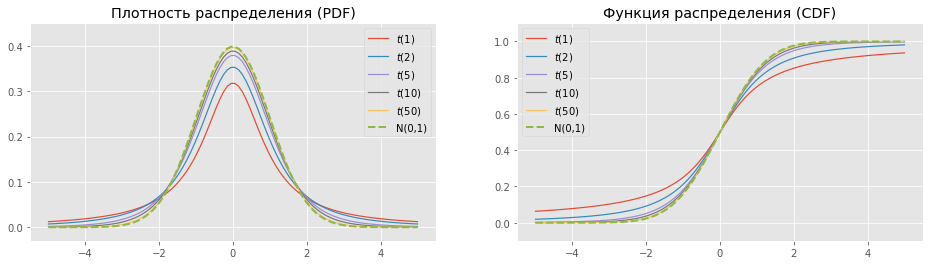

In [ ]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

for k in [1, 2, 5, 10, 50]:    
    rv = sts.t(df=k)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x) 
    ax[0].plot(x, pdf, label="$t(%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf, label="$t(%s)$" % k, lw=1.2)


rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[0].set_ylim(-0.03,0.45)
ax[0].set_title("Плотность распределения (PDF)")
ax[0].legend() 

ax[1].set_ylim(-0.1,1.1)
ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[1].set_title("Функция распределения (CDF)")
ax[1].legend();

Конечно же держите гифку. Как же без неё: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_convdist_student.gif" width="1500"> 
</center>

#  Мощь средних 

Теперь обсудим мощь средних и доверительные интервалы для них.

## Ещё раз о квантилях

In [ ]:
norm_rv = stats.norm(loc=0, scale=1)  # задали генератор 
norm_rv.ppf(0.025) # нашли квантиль

-1.9599639845400545

In [ ]:
alpha = 0.05
stats.norm(loc=0, scale=1).ppf(1-alpha/2)

1.959963984540054

In [ ]:
stats.norm(loc=0, scale=1).ppf(alpha/2)

-1.9599639845400545

In [ ]:
(1-stats.norm(loc=0, scale=1).cdf(2))*2

0.04550026389635842

Число $-1.96$ это квантиль уровня $2.5\%$. Давайте нарисуем его на графике плотности. 

(-1.959963984540054, 1.959963984540054)

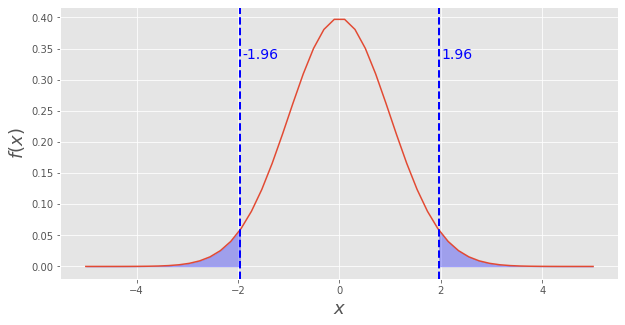

In [ ]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right
    
alpha = 0.05
norm_conf_int(0.05)

## Мощь средних и асимптотические доверительные интервалы

__Ещё раз, ещё раз.__ Среднее хорошо тем, что есть ЦПТ, которая говорит нам, как оно распределено

$$ 
\bar x \overset{asy}{\sim} N \left(\mu, \frac{\sigma^2}{n}\right),
$$ 

На основе этого мы можем построить для среднего доверительный интервал.

### Ульяна смотрит игру престолов

Ульяна любит сериалы! Конечно же, Игра Престолов не обошла её стороной. Она смотрит её каждый день. Пусть $X$ - число серий, которое Ульяна просмотрела за день. Так как число серий - счётчик, можно предположить, что $X \sim Poiss(\lambda)$, где $\lambda$ - интенсивность просмотра. Не забыли же ещё, что случайные величины счётчики можно (но не обязательно) моделировать с помощью распределения Пуассона? 

Ульяне стало интересно с какой интенсивностью она смотрит сериалы, и теперь она хочет построить для $\lambda$ оценку методом моментов, а после доверительный интервал для неё. 

In [ ]:
# Ульяна рассказала о том, сколько серий посмотрела на этой неделе
x = [5, 7, 8, 2, 3, 1, 2]

$$
\hat \lambda = \bar x
$$

In [ ]:
lam_hat = np.mean(x)
lam_hat

4.0

$$
\hat \lambda \overset{asy}{\sim} N \left(\lambda, \frac{\hat \lambda}{n} \right).
$$

$$
\hat \lambda \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat \lambda}{n}}
$$

In [ ]:
norm_rv = stats.norm(loc=0, scale=1)

alpha = 0.05                       # задаём уровень значимости 
z_alpha = norm_rv.ppf(1 - alpha/2) # из нормального распределения автоматически посчитался квантиль

lam_hat = np.mean(x)               # нашли оценку параметра 
lam_se = np.sqrt(lam_hat/len(x))   # оценили стандартное отклонение 

# по формулам посчитали границы
lam_left = lam_hat - z_alpha*lam_se
lam_right = lam_hat + z_alpha*lam_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{lam_left:.3}, {lam_right:.3}] ширины { lam_right - lam_left:.3}")

Доверительный интервал [2.52, 5.48] ширины 2.96


По аналогии можно построить асимптотический доверительный интервал с помощью уже готовой функции. Единственное, что от нас потребуется: вычислить среднее и дисперсию. 

In [ ]:
lam_hat = np.mean(x)             # нашли оценку параметра 
lam_se = np.sqrt(lam_hat/len(x)) # оценили стандартное отклонение 

stats.norm.interval(0.95, loc=lam_hat, scale=lam_se)

(2.518406490932507, 5.481593509067493)

Можно построить этот же доверительный интервал на картинке с помощью функции, которую мы написали в самом начале тетрадки. 

(2.518406490932507, 5.481593509067493)

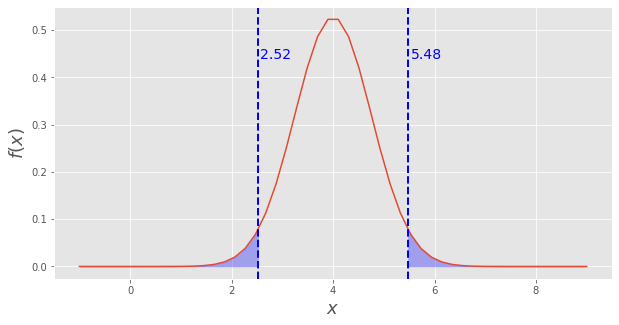

In [ ]:
alpha = 0.05
norm_conf_int(alpha, mean_hat=lam_hat, std_hat=lam_se)

###  Подруга Ульяны

Теперь Таня и Ульяна смотрят сериалы вдвоём. Каждая со своей интенсивностью $\lambda_i$. 

Ульяна считает, что она опережает Таню по интенсивности просмотра. Нужно построить доверительный интервал для разности $\lambda_1 - \lambda_2$ и понять, правда ли, что Ульяна впереди. Для простоты будем считать, что Ульяна и Таня смотрят сериалы независимо друг от друга. 

In [ ]:
x = [5, 7, 8, 2, 3, 1, 2]  # Ульяна
y = [1, 1, 9, 1, 2, 2, 2]  # Таня 

In [ ]:
np.mean(x), np.mean(y)

(4.0, 2.5714285714285716)

$$
\hat \lambda_1 - \hat \lambda_2 \overset{asy}{\sim} N \left( \lambda_1 - \lambda_2, \frac{\hat \lambda_1}{n_1} + \frac{\hat \lambda_2}{n_2} \right).
$$

$$
\hat{\lambda}_1 - \hat{\lambda}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{\lambda}_1}{n_1} + \frac{\hat{\lambda}_2}{n_2}}
$$

In [ ]:
alpha = 0.05 # задаём уровень значимости 

z_alpha = norm_rv.ppf(1 - alpha/2) # квантиль для нормального

diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [-0.47, 3.33] ширины 3.8


Доверительный интервал покрывает ноль. Это означает, что Ульяна и Таня смотрят сериал с одинаковой интенсивностью.

Угадайте как часто мы сделаем ошибку, утверждая это? Правильно! В $5\%$ случаев. 

Фактически мы с вами только что проверили на уровне значимости $5\%$ гипотезу о равенстве средних. Зафиксируйте это в голове и вспомните, когда мы чётко и по шагам формализуем процедуру проверки гипотез. 

(-0.47044607117023984, 3.3275889283130966)

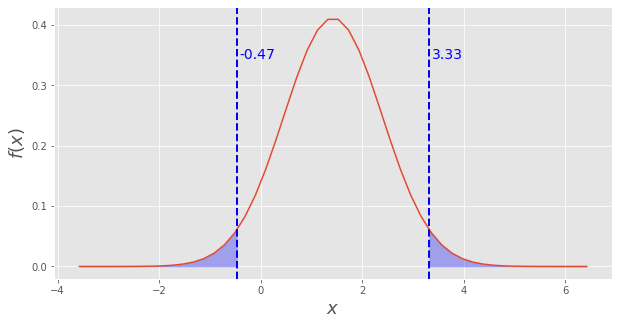

In [ ]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)